In [1]:
from heterogeneous_model import *
from sparseness_expansion import *

Figures to be included in this section:
SYMMETRIC MODALITIES
1. Histogram and similarity matrix for small $p_{3}$
2. Histogram and similarity matrix for $p_{3} \rightarrow 1$
3. Theory and simulation for $\mathcal{C}$ term (Part 3)
4. E-value spectrum for different values of $p_{3}$ (Part 4)
5. Ternary plot of readout error

## 1. Histogram and sim matrix, $p_{3}$ small

## First, theory functions 

In [2]:
gauss_uncoup = lambda y,x: (1/(2*np.pi*np.sqrt(1 - (1/2)**(2))))\
                                        *np.exp(-(1./(2*(1 - (1/2)**(2))))*(x**(2) + y**(2) - 2*x*y*(1/2)))

In [3]:
def two_dim_integral(t_in):
    """
    Gives \mathcal{I} term
    Parameters
    ----------
    t_in : Regular T

    """
    res = integrate.dblquad(gauss_uncoup, t_in, np.inf, lambda x: t_in, lambda x: np.inf)
    return res[0]

In [4]:
def compute_peak_mixed(th,f,q1,q2):

    f2 = f*(1-f)

    integ = two_dim_integral(th)
    print("integ",integ)
    feff = integ

    t1 = (q1 + q2)*feff
    t2 = (-q1-q2)*f**(2) #For mean subtracted

    peak_mixed = feff - f**(2)
    
    return peak_mixed

In [5]:
#One Gaussian peaks - same gamma different mu

def compute_peak_q2(p1,p2,f,peak_mixed):
    f2 = f*(1-f)
    peak_eff_q2 = p1*f2 + p3*peak_mixed
    return peak_eff_q2

In [6]:
#Other Gaussian peak - same mu different gamma

def compute_peak_q1(p1,p2,f,peak_mixed):
    f2 = f*(1-f)
    peak_eff_q1 = p2*f2 + p3*peak_mixed
    return peak_eff_q1

In [41]:
N=100
H=2100
P=10
K=10
ds=0.1
dc=0.1
th=0.8
Peff = P*K
rand_int = np.random.randint(Peff)

p3=0.6
rem = 1-p3
p1 = rem/2
p2=p1

h, h_test = generate_hetergeneous(H,N,P,K,p1,p2,p3,d_stim=ds,d_cont=dc)

In [42]:
f = erf1(th)
o = 0.5*(np.sign(h - th) + 1) - f
cov_o_small = (1/H)*np.matmul(o.T,o)

In [7]:
#Large matrix just for histogram
N=100
H=2100
P=100
K=100
ds=0.1
dc=0.1
th=0.8
Peff = P*K
rand_int = np.random.randint(Peff)

p3=0.6
rem = 1-p3
p1 = rem/2
p2=p1

h_large, h_test = generate_hetergeneous(H,N,P,K,p1,p2,p3,d_stim=ds,d_cont=dc)

In [8]:
f = erf1(th)
o_large = 0.5*(np.sign(h_large - th) + 1) - f
cov_o_large = (1/H)*np.matmul(o_large.T,o_large)

In [9]:
o1 = cov_o_large[:,int(np.random.randint(P*K))]

In [10]:
Peff = P*K
q1 = ((K-1)/(Peff-1))
q2 = ((P-1)/(Peff-1))
peak_mixed = compute_peak_mixed(th,f,q1,q2)
peak_eff_q1 = compute_peak_q1(p1,p2,f,peak_mixed)
peak_eff_q2 = compute_peak_q2(p1,p2,f,peak_mixed)

integ 0.09468623185308458


In [11]:
from IPython import display

In [12]:
display.set_matplotlib_formats('svg')

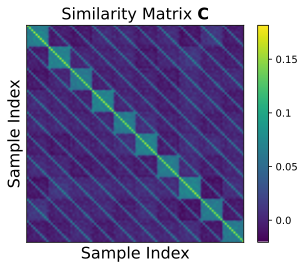

In [47]:
fig = plt.figure(figsize=(5,4))
plt.title(r'Similarity Matrix $\mathbf{C}$', fontsize=16)
plt.imshow(cov_o_small)

#divider = make_axes_locatable(ax1)
#cax = divider.append_axes("left", size="5%", pad=1.05)
#plt.tight_layout()
cbar = plt.colorbar()
cbar.set_ticks([0, 0.05, 0.10, 0.15])
cbar.set_ticklabels([0.00, 0.05, 0.10, 0.15])
plt.xticks([])
plt.yticks([])
plt.xlabel('Sample Index', fontsize=16)
plt.ylabel('Sample Index', fontsize=16)
plt.savefig('multi_hetero_cov_m.png',transparent=True,dpi=600,bbox_inches='tight')
plt.show()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


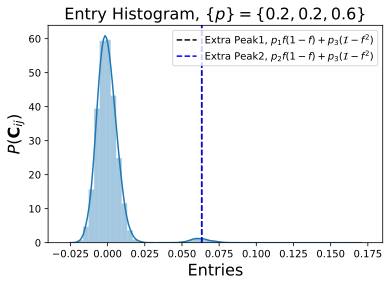

In [13]:
fig = plt.figure(figsize=(6,4))
ax2 = fig.add_subplot(111)
ax2.set_title(r'Entry Histogram, $\{p\} = \{0.2,0.2,0.6\}$',fontsize=16)
sns.distplot(o1, norm_hist=True)
ax2.axvline(peak_eff_q2,color='black',linestyle='--',label=r'Extra Peak1, $p_{1}f(1-f) + p_{3}(\mathcal{I}-f^{2})$')
ax2.axvline(peak_eff_q1,color='blue',linestyle='--',label=r'Extra Peak2, $p_{2}f(1-f) + p_{3}(\mathcal{I}-f^{2})$')
ax2.set_xlabel(r'Entries',fontsize=16)
ax2.set_ylabel(r'$P(\mathbf{C}_{ij})$',fontsize=16)
ax2.set_xlim(-0.04,0.185)
ax2.legend()
plt.savefig('multi_hetero_histogram_cov_m.png',transparent=True,dpi=600,bbox_inches='tight')
plt.show()

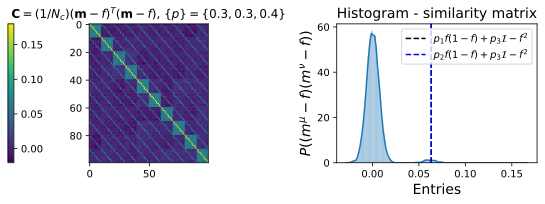

In [32]:
##IMSHOW OF H
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython import display
display.set_matplotlib_formats('svg')
path_fig = 'figures_section4'

fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(121)
ax1.set_title(r'$\mathbf{C}  = (1/N_{c})(\mathbf{m} - f)^{T}(\mathbf{m} - f)$, $\{ p \} = \{ 0.3,0.3,0.4 \}$')
im1 = ax1.imshow(cov_o_small,aspect='auto')
ax2 = fig.add_subplot(122)
ax2.set_title(r'Histogram - similarity matrix',fontsize=14)
sns.distplot(o1,bins=150)
ax2.axvline(peak_eff_q2,color='black',linestyle='--',label=r'$p_{1}f(1-f) + p_{3}\mathcal{I}-f^{2}$')
ax2.axvline(peak_eff_q1,color='blue',linestyle='--',label=r'$p_{2}f(1-f) + p_{3}\mathcal{I}-f^{2}$')
ax2.set_xlabel(r'Entries',fontsize=14)
ax2.set_ylabel(r'$P((m^{\mu}-f) (m^{\nu}-f))$',fontsize=14)
ax2.legend()
divider = make_axes_locatable(ax1)
cax = divider.append_axes("left", size="5%", pad=1.05)
plt.tight_layout()
plt.colorbar(im1,cax=cax)
#plt.savefig('{}/histogram_cov_m_p3small.png'.format(path_fig),transparent=True,dpi=200,bbox_inches='tight')
plt.show()

## 2. Same as above, but $p_{3} \rightarrow 1$

In [28]:
N=100
H=2100
P=10
K=10
ds=0.1
dc=0.1
th=0.8
Peff = P*K
rand_int = np.random.randint(Peff)

p3=1.0
rem = 1-p3
p1 = rem/2
p2=p1

h, h_test = generate_hetergeneous(H,N,P,K,p1,p2,p3,d_stim=ds,d_cont=dc)

In [29]:
f = erf1(th)
o = 0.5*(np.sign(h - th) + 1) - f
cov_o_small = (1/H)*np.matmul(o.T,o)

In [14]:
#Large matrix just for histogram
N=100
H=2100
P=100
K=100
ds=0.1
dc=0.1
th=0.8
Peff = P*K
rand_int = np.random.randint(Peff)

p3=1.0
rem = 1-p3
p1 = rem/2
p2=p1

h_large, h_test = generate_hetergeneous(H,N,P,K,p1,p2,p3,d_stim=ds,d_cont=dc)

In [15]:
f = erf1(th)
o_large = 0.5*(np.sign(h_large - th) + 1) - f
cov_o_large = (1/H)*np.matmul(o_large.T,o_large)

In [16]:
o1 = cov_o_large[:,int(np.random.randint(P*K))]

In [17]:
Peff = P*K
q1 = ((K-1)/(Peff-1))
q2 = ((P-1)/(Peff-1))
peak_mixed = compute_peak_mixed(th,f,q1,q2)
peak_eff_q1 = compute_peak_q1(p1,p2,f,peak_mixed)
peak_eff_q2 = compute_peak_q2(p1,p2,f,peak_mixed)

integ 0.09468623185308458


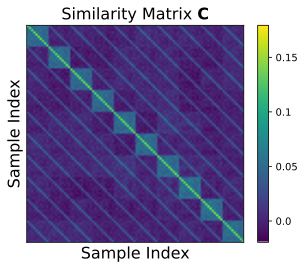

In [35]:
fig = plt.figure(figsize=(5,4))
plt.title(r'Similarity Matrix $\mathbf{C}$', fontsize=16)
plt.imshow(cov_o_small)

#divider = make_axes_locatable(ax1)
#cax = divider.append_axes("left", size="5%", pad=1.05)
#plt.tight_layout()
cbar = plt.colorbar()
cbar.set_ticks([0, 0.05, 0.10, 0.15])
cbar.set_ticklabels([0.00, 0.05, 0.10, 0.15])
plt.xticks([])
plt.yticks([])
plt.xlabel('Sample Index', fontsize=16)
plt.ylabel('Sample Index', fontsize=16)
plt.savefig('multi_fully_cov_m.png',transparent=True,dpi=600,bbox_inches='tight')
plt.show()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


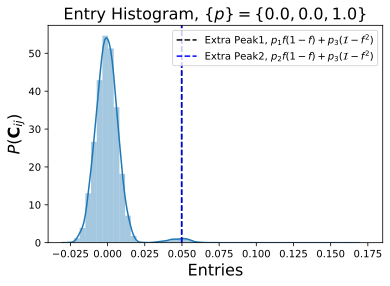

In [18]:
fig = plt.figure(figsize=(6,4))
ax2 = fig.add_subplot(111)
ax2.set_title(r'Entry Histogram, $\{p\} = \{0.0,0.0,1.0\}$',fontsize=16)
sns.distplot(o1, norm_hist=True)
ax2.axvline(peak_eff_q2,color='black',linestyle='--',label=r'Extra Peak1, $p_{1}f(1-f) + p_{3}(\mathcal{I}-f^{2})$')
ax2.axvline(peak_eff_q1,color='blue',linestyle='--',label=r'Extra Peak2, $p_{2}f(1-f) + p_{3}(\mathcal{I}-f^{2})$')
ax2.set_xlabel(r'Entries',fontsize=16)
ax2.set_ylabel(r'$P(\mathbf{C}_{ij})$',fontsize=16)
ax2.set_xlim(-0.04,0.185)
ax2.legend()
plt.savefig('multi_fully_histogram_cov_m.png',transparent=True,dpi=600,bbox_inches='tight')
plt.show()

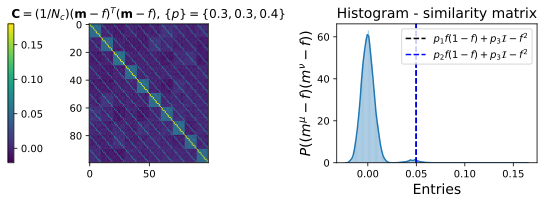

In [76]:
##IMSHOW OF H
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython import display
display.set_matplotlib_formats('svg')
path_fig = 'figures_section4'

fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(121)
ax1.set_title(r'$\mathbf{C}  = (1/N_{c})(\mathbf{m} - f)^{T}(\mathbf{m} - f)$, $\{ p \} = \{ 0.3,0.3,0.4 \}$')
im1 = ax1.imshow(cov_o_small,aspect='auto')
ax2 = fig.add_subplot(122)
ax2.set_title(r'Histogram - similarity matrix',fontsize=14)
sns.distplot(o1,bins=150)
ax2.axvline(peak_eff_q2,color='black',linestyle='--',label=r'$p_{1}f(1-f) + p_{3}\mathcal{I}-f^{2}$')
ax2.axvline(peak_eff_q1,color='blue',linestyle='--',label=r'$p_{2}f(1-f) + p_{3}\mathcal{I}-f^{2}$')
ax2.set_xlabel(r'Entries',fontsize=14)
ax2.set_ylabel(r'$P((m^{\mu}-f) (m^{\nu}-f))$',fontsize=14)
ax2.legend()
divider = make_axes_locatable(ax1)
cax = divider.append_axes("left", size="5%", pad=1.05)
plt.tight_layout()
plt.colorbar(im1,cax=cax)
plt.savefig('{}/histogram_cov_m_p3large.png'.format(path_fig),transparent=True,dpi=200,bbox_inches='tight')
plt.show()

## 3. Theory and simulation for $\mathcal{C}$ term

In [19]:
def compute_part3(f,q1,q2,p1,p2,p3,ds,dc):
    size1 = erf_full(th,ds,f)
    size2 = erf_full(th,dc,f)
    
    f_one_minus = f*(1-f)
    
    #Peaks
    p_xi = (1/2)*(1 - ds)
    p_phi = (1/2)*(1 - dc)
    
    #Intergral limits
    sqrt_xi = np.sqrt(1 - p_xi**(2))
    sqrt_phi = np.sqrt(1 - p_phi**(2))
    t_xi = th/(sqrt_xi)
    t_phi = th/(sqrt_phi)
    
    #Get the two dimensional integrals
    i_phi = two_dim_i_integral(t_phi,p_phi)
    i_xi = two_dim_i_integral(t_xi,p_xi)
    
    r_xi = f_one_minus*(1-size1)
    r_phi = f_one_minus*(1-size2)
    r_mixed = (q1)*(sqrt_xi)*(i_xi) + (q2)*(sqrt_phi)*(i_phi)  + (1-q1-q2)*f**(2)
    #print("q1+q2",q1+q2)
    #print("r_mixed",r_mixed)

    corr_m = p1*(f**(2) + q1*r_xi) + p2*(f**(2) + q2*r_phi) + p3*r_mixed
    diff = f**(2) - corr_m
    
    rat = (2*f - 1)**(2) / ((f*(1-f))**(2))
    
    f_term = - rat*(diff)
    
    return f_term

def compute_part3_compare(th,P,K,ds=0.1,dc=0.1):
    f = erf1(th)
    Peff = int(P*K)
    
    q1 = ((K-1)/(Peff-1))
    q2 = ((P-1)/(Peff-1))
    
    #Limit one, p1 --> 1
    p1_1 = 1.0
    diff1 = 1-p1_1
    p2_1 = diff1/2
    p3_1 = p2_1
    
    #print("p's 1",p1_1,p2_1,p3_1)
    
    f_term1 = compute_part3(f,q1,q2,p1_1,p2_1,p3_1,ds,dc)
    
    #Limit one, p2 --> 1
    p2_2 = 1.0
    diff2 = 1-p2_2
    p1_2 = diff2/2
    p3_2 = p1_2
    
    #print("p's 2",p1_2,p2_2,p3_2)
    
    f_term2 = compute_part3(f,q1,q2,p1_2,p2_2,p3_2,ds,dc)
    
    #Limit one, p3 --> 1
    p3_3 = 1.0
    diff3 = 1-p3_3
    p2_3 = diff3/2
    p1_3 = p2_3
    
    #print("p's 3",p1_3,p2_3,p3_3)
    
    f_term3 = compute_part3(f,q1,q2,p1_3,p2_3,p3_3,ds,dc)
    
    return f_term1, f_term2, f_term3   

In [24]:
##Symmetric modalities
#Calculate C
prod = 100
P=10
K=int(prod/P)
print("K",K)
Peff = P*K
d_xi=0.1
d_phi=0.1
p3=1.0
diff=1-p3
p1=diff/2
p2=p1

# p2=1.0
# diff=1-p2
# p1 = diff/2
# p3=p1

th=2.2
q1 = (K-1)/(Peff-1)
q2 = (P-1)/(Peff-1)
f = erf1(th)
print("f is",f)
c = compute_part3(f,q1,q2,p1,p3,p2,ds=d_xi,dc=d_phi)
print("C term",c)

K 10
f is 0.013903447513497518
C term 3.467018595547021


In [25]:
th_list = np.linspace(0,3.1,20)
P=20
#K=int(prod/P)
K=20
f1_list = np.zeros(len(th_list))
f2_list = np.zeros(len(th_list))
f3_list = np.zeros(len(th_list))
cods_list = np.zeros(len(th_list))

for i,th in enumerate(th_list):
    f = erf1(th)
    f1,f2,f3 = compute_part3_compare(th,P,K)
    f1_list[i] = f1
    f2_list[i] = f2
    f3_list[i] = f3
    cods_list[i] = f

In [26]:
H=2100
N=100
ds=0.1
dc=0.1

#Limit one, p1 --> 1
p1_1 = 1.0
diff1 = 1-p1_1
p2_1 = diff1/2
p3_1 = p2_1

#Limit one, p2 --> 1
p2_2 = 1.0
diff2 = 1-p2_2
p1_2 = diff2/2
p3_2 = p1_2


#Limit one, p3 --> 1
p3_3 = 1.0
diff3 = 1-p3_3
p2_3 = diff3/2
p1_3 = p2_3
    
    
h1,h_test = generate_hetergeneous(H,N,P,K,p1_1,p2_1,p3_1,d_stim=ds,d_cont=dc)
h2,h_test2 = generate_hetergeneous(H,N,P,K,p1_2,p2_2,p3_2,d_stim=ds,d_cont=dc)
h3,h_test3 = generate_hetergeneous(H,N,P,K,p1_3,p2_3,p3_3,d_stim=ds,d_cont=dc)

f1_emps = np.zeros(len(th_list))
f2_emps = np.zeros(len(th_list))
f3_emps = np.zeros(len(th_list))

def comp_corr(f,tp):
    rat = (2*f - 1)**(2) / ((f*(1-f))**(2))
    diff = tp
    c_term = rat*(diff)
    
    return c_term


for i,th in enumerate(th_list):
    f = erf1(th)
    m1 = 0.5*(np.sign(h1 - th) + 1) - f
    m2 = 0.5*(np.sign(h2 - th) + 1) - f
    m3 = 0.5*(np.sign(h3 - th) + 1) - f
    ovs1 = []
    ovs2 = []
    ovs3 = []
    for p in range(m1.shape[1]):
        for q in range(m1.shape[1]):
            if p!=q:
                #print("p,q",p,q)
                ov1 = (1/H)*np.dot(m1[:,p],m1[:,q])
                ovs1.append(comp_corr(f,ov1))
                ov2 = (1/H)*np.dot(m2[:,p],m2[:,q])
                ovs2.append(comp_corr(f,ov2))
                ov3 = (1/H)*np.dot(m3[:,p],m3[:,q])
                ovs3.append(comp_corr(f,ov3))
                
                
    f1_emps[i] = np.mean(ovs1)
    f2_emps[i] = np.mean(ovs2)
    f3_emps[i] = np.mean(ovs3)

In [27]:
#Test some values
th = 2.8
f = erf1(th)
print("f is",f)
val = compute_part3(f,q1,q2,p1_1,p2_1,p3_1,ds,dc)
print("val",val)
m1 = 0.5*(np.sign(h1 - th) + 1) - f
ovs1 = []
for m in range(m1.shape[1]):
    for n in range(m1.shape[1]):
        ov1 = (1/H)*np.dot(m1[:,p],m1[:,q])
        ovs1.append(comp_corr(f,ov1))
        
c_emp = np.mean(ovs1)
print("c_theory",c_emp)

f is 0.00255513033042793
val 16.835798003609998
c_theory 145.38306255301296


In [54]:
#Print empirical values
print(f1_emps)

[3.42351973e-32 5.35051582e-03 2.22285541e-02 5.25215654e-02
 1.02681850e-01 1.80172298e-01 2.83888698e-01 4.36576606e-01
 6.64261930e-01 9.62024548e-01 1.41883834e+00 2.04023387e+00
 3.06246052e+00 4.73374212e+00 7.32246167e+00 1.07412071e+01
 1.83860856e+01 2.88921662e+01 5.84736564e+01 9.13290971e+01]


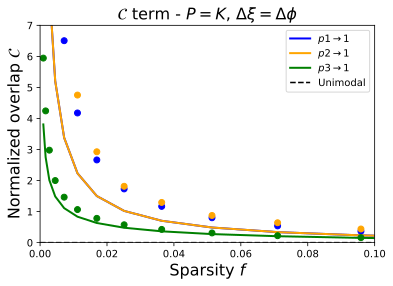

In [30]:
#path4 = 'figures_section4'
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython import display
display.set_matplotlib_formats('svg')

fu_list = [(f*(1-f))**(2) for f in cods_list]
fig = plt.figure(figsize=[6,4])
plt.title(r'$\mathcal{C}$ term - $P=K$, $\Delta \xi=\Delta \phi$', fontsize=16)
plt.plot(cods_list,f1_list,'-',color='blue',label=r'$p1 \rightarrow 1$', lw=2)
plt.plot(cods_list,f1_emps,'o',color='blue')
plt.plot(cods_list,f2_list,'-',color='orange',label=r'$p2 \rightarrow 1$', lw=2)
plt.plot(cods_list,f2_emps,'o',color='orange')
plt.plot(cods_list,f3_list,'-',color='green',label=r'$p3 \rightarrow 1$', lw=2)
plt.plot(cods_list,f3_emps,'o',color='green')
#plt.plot(cods_list,fu_list,color='black',label=r'$Unimodal$')
plt.xlabel(r'Sparsity $f$',fontsize=16)
plt.ylabel(r'Normalized overlap $\mathcal{C}$',fontsize=16)
plt.xlim(0.0,0.1)
plt.ylim(0,7)
plt.axhline(0,color='black',linestyle='--',label=r'Unimodal')
plt.legend()
plt.savefig('correction_term_symm.png',transparent=True,dpi=600,bbox_inches='tight')
plt.show()

## 4. Eigenvalue spectrum for different values of $p_{3}$

In [31]:
N=100
P=50
K=50
H=2100
th=0.8

In [32]:
###Give 3 configs
p3_1 = 0.2
diff1 = 1 - p3_1
p1_1 = diff1/2
p2_1 = p1_1

p3_2 = 0.6
diff2 = 1 - p3_2
p1_2 = diff2/2
p2_2 = p1_2

p3_3 = 1.0
diff3 = 1 - p3_3
p1_3 = diff3/2
p2_3 = p1_3

In [33]:
###Same 3 configs as above
th = 0.8
dstim=0.1
dcont=0.1
f = erf1(th)
h1,h_test1 = generate_hetergeneous(H,N,P,K,p1_1,p2_1,p3_1,d_stim=dstim,d_cont=dcont)
o1 = 0.5*(np.sign(h1 - th) + 1) - f
cov1 = (1/H)*np.matmul(o1.T,o1)
eigs1 = LA.eigvals(cov1)

h2,h_test2 = generate_hetergeneous(H,N,P,K,p1_2,p2_2,p3_2,d_stim=dstim,d_cont=dcont)
o2 = 0.5*(np.sign(h2 - th) + 1) - f
cov2 = (1/H)*np.matmul(o2.T,o2)
eigs2 = LA.eigvals(cov2)


h3,h_test3 = generate_hetergeneous(H,N,P,K,p1_3,p2_3,p3_3,d_stim=dstim,d_cont=dcont)
o3 = 0.5*(np.sign(h3 - th) + 1) - f
cov3 = (1/H)*np.matmul(o3.T,o3)
eigs3 = LA.eigvals(cov3)

/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


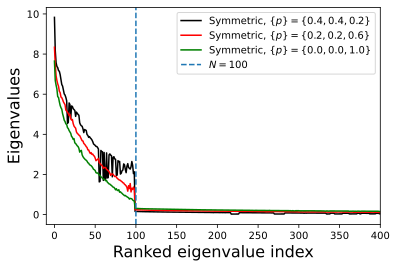

In [44]:
plt.figure(figsize=[6,4])
#plt.title(r'Comparison of eigenvalue spectrum - unimodal vs. multi-modal',fontsize=14)
plt.plot(eigs1,color='black',label=r'Symmetric, $\{ p \} = \{ 0.4,0.4,0.2 \}$')
plt.plot(eigs2,color='red',label=r'Symmetric, $\{ p \} = \{ 0.2,0.2,0.6 \}$')
plt.plot(eigs3,color='green',label=r'Symmetric, $\{ p \} = \{ 0.0,0.0,1.0 \}$')
plt.axvline(N,linestyle='--',label='$N=100$')
plt.xlabel(r'Ranked eigenvalue index',fontsize=16)
plt.ylabel(r'Eigenvalues',fontsize=16)
plt.xlim(-10,400)
plt.legend()
plt.savefig('comparison_eigenvalues.png',transparent=True,dpi=600,bbox_inches='tight')
plt.show()

/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


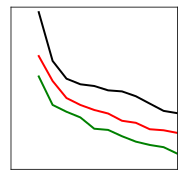

In [45]:
plt.figure(figsize=[3,3])
#plt.title(r'Comparison of eigenvalue spectrum - unimodal vs. multi-modal',fontsize=14)
plt.plot(eigs1,color='black',label=r'Unimodal', lw=2)
plt.plot(eigs2,color='red',label=r'Multimodal, $\{ p \} = \{ 0.3,0.3,0.4 \}$', lw=2)
plt.plot(eigs3,color='green',label=r'Multimodal, $\{ p \} = \{ 0.0,0.0,1.0 \}$', lw=2)
plt.axvline(N,linestyle='--',label='$N=100$', lw=2)
#plt.xlabel(r'Ranked eigenvalue index',fontsize=16)
#plt.ylabel(r'Eigenvalues',fontsize=16)
plt.xlim(-2,10)
plt.ylim(4.5,10)
plt.xticks([])
plt.yticks([])
#plt.legend()
plt.savefig('comparison_eigenvalues_inner.png',transparent=True,dpi=600,bbox_inches='tight')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


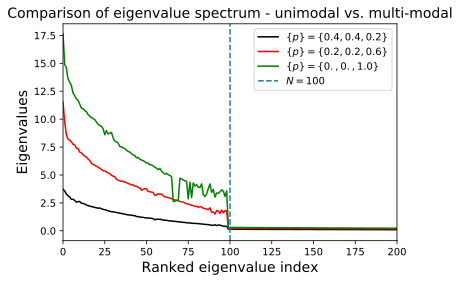

In [13]:
path4 = 'figures_section4'
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython import display
display.set_matplotlib_formats('svg')

plt.figure()
plt.title(r'Comparison of eigenvalue spectrum - unimodal vs. multi-modal',fontsize=14)
plt.plot(eigs1,color='black',label=r'$\{ p \} = \{ 0.4,0.4,0.2 \}$')
plt.plot(eigs2,color='red',label=r'$\{ p \} = \{ 0.2,0.2,0.6 \}$')
plt.plot(eigs3,color='green',label=r'$\{ p \} = \{ 0.,0.,1.0 \}$')
plt.axvline(N,linestyle='--',label='$N=100$')
plt.xlabel(r'Ranked eigenvalue index',fontsize=14)
plt.ylabel(r'Eigenvalues',fontsize=14)
plt.xlim(0,200)
plt.legend()
plt.savefig('{}/comparison_eigenvalues_symm.png'.format(path4),transparent=True,dpi=200,bbox_inches='tight')
plt.show()

## 5. Ternary plots for symmetric modalities

In [6]:
from tqdm import tqdm_notebook
from ternary.helpers import simplex_iterator
import ternary
from scipy.special import comb, perm

In [7]:
n=10 # grid size
def func_run_grid_sim(n,N,H,P,K,d_xi,d_phi,th):
    Record_2= dict()


    for i,j,k in tqdm_notebook(simplex_iterator(n),total = comb(n+2,n)):

        p1 = i / float(n)
        p2 = j / float(n)
        p3 = k / float(n)
        
        #print("p values are",p1,p2,p3)

        Record_2[(i,j,k)] = hebbian_mixed_layer_heterogeneous(H,N,P,K,th,p1,p2,p3,ds=d_xi,dc=d_phi)[1]
        
    return Record_2

In [8]:
N=100
P=10
K=10
H=2100
th=0.8
dstim=0.1
dcont=0.1
Record_3 = func_run_grid_sim(n,N,H,P,K,dstim,dcont,th)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


sparsity is 0.2038095238095238
d_out is 0.2981525525434394
d_out theory 0.3104583856607475
thresholds 0.8958280175293669 0.8958280175293669
part3 0.05215106004723212
i4 intra 1.5897597721083623
part 4's 0.0005477333077336562 0.0005477333077336562
i4 inter 0.0
sparsity is 0.22428571428571428
d_out is 0.30478323487797
d_out theory 0.3104583856607475
thresholds 0.8958280175293669 0.8958280175293669
part3 0.04974563206985934
i4 intra 1.333226210754227
part 4's 0.0005477333077336562 0.0005477333077336562
i4 inter 0.35363136342710233
sparsity is 0.2180952380952381
d_out is 0.2876860561272127
d_out theory 0.3104583856607475
thresholds 0.8958280175293669 0.8958280175293669
part3 0.047340204092486564
i4 intra 1.1995294355351656
part 4's 0.0005477333077336562 0.0005477333077336562
i4 inter 0.6286779794259598
sparsity is 0.2138095238095238
d_out is 0.2988084910109413
d_out theory 0.3104583856607475
thresholds 0.8958280175293669 0.8958280175293669
part3 0.04493477611511378
i4 intra 1.1886694464511

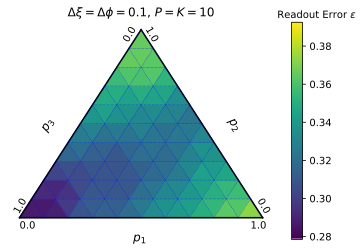

In [9]:
path4 = 'figures_section4'
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython import display
display.set_matplotlib_formats('svg')


figure, tax = ternary.figure(scale=n)
tax.heatmap(Record_3,scale=n)
tax.boundary()
tax.left_axis_label("$p_3$",offset=0.14,fontsize=12)
tax.right_axis_label("$p_2$",offset=0.14,fontsize=12)
tax.bottom_axis_label("$p_1$",fontsize=12)

tax.gridlines(multiple = 1, color="blue")

plt.text(0,-0.5,'0.0')
plt.text(9.5,-0.5,'1.0')

plt.text(9.7,0.2,'0.0',rotation=-60)
plt.text(5.1,8.1,'1.0',rotation = -60)

plt.text(4.2,8.1,'0.0',rotation= 60)
plt.text(-0.3,0.2,'1.0',rotation = 60)


plt.text(10.6,9.2,r'Readout Error $\epsilon$')

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.set_title(r'$\Delta \xi = \Delta \phi = 0.1$, $P = K = 10$',y=1)

plt.savefig('{}/comparison_readout_err_symm.png'.format(path4),transparent=True,dpi=200,bbox_inches='tight')
plt.show()